In [172]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import joblib

In [173]:
df = pd.read_csv('datos_gambling.csv') #Features que se usaran para el clustering

In [174]:
df.columns

Index(['Unnamed: 0', 'player_win', 'player_loss', 'push', 'total_hands',
       'win_pct', 'win_push', 'win_push_pct', 'doubles_won', 'doubles_lost',
       'doubles_won_pct', 'player_bj', 'dealer_bj', 'dealer_high_card',
       'dealer_low_card', 'dealer_bust', 'dealer_draw', 'dealer_stand',
       'dealer_bust_pct', 'dealer_draw_pct', 'dealer_stand_pct',
       'dealer_avg_hand', 'num_of_shuffles', 'shuffle_method'],
      dtype='object')

In [175]:
df = df.drop(["Unnamed: 0", "win_pct", "win_push_pct", "doubles_won_pct", "dealer_high_card", "dealer_low_card", "dealer_bust_pct", "shuffle_method", "dealer_draw_pct", "dealer_stand_pct"], axis=1)

In [176]:
df

,player_win,player_loss,push,total_hands,win_push,doubles_won,doubles_lost,player_bj,dealer_bj,dealer_bust,dealer_draw,dealer_stand,dealer_avg_hand,num_of_shuffles
0,20,23,3,46,23,1,1,1,2,12,16,18,17.852,1
1,14,31,1,46,15,2,7,2,1,7,21,18,18.258,2
2,23,22,3,48,26,4,2,2,2,14,18,16,18.267,3
3,21,23,4,48,25,3,1,2,3,13,14,21,18.168,4
4,18,28,3,49,21,3,1,0,4,9,19,21,18.199,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,20,24,3,47,23,2,1,2,0,15,13,19,18.096,92
2876,26,20,2,48,28,3,2,5,3,12,13,23,18.078,93
2877,21,22,3,46,24,3,4,3,1,14,18,14,18.076,94
2878,25,19,3,47,28,4,1,1,0,14,14,19,18.071,95


In [177]:
#Diferenciamos los feature a usar
#numeric_features = ['edad', 'frecuencia_juego', 'duracion_sesiones', 'monto_apostado', 'cambios_monto_apostado', 'ganancias_perdidas', 'historial_juego']
#categorical_features = ['genero', 'nivel_educativo', 'ingresos', 'estado_civil', 'decisiones_juego', 'contexto_social', 'motivaciones_jugar']

numeric_features = df.columns

In [178]:
numeric_features

Index(['player_win', 'player_loss', 'push', 'total_hands', 'win_push',
       'doubles_won', 'doubles_lost', 'player_bj', 'dealer_bj', 'dealer_bust',
       'dealer_draw', 'dealer_stand', 'dealer_avg_hand', 'num_of_shuffles'],
      dtype='object')

In [179]:
#Definimos la transformacion de los feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
        #('cat', OneHotEncoder(), categorical_features)
    ])

In [180]:
#Aplicamos la transformacion
X = preprocessor.fit_transform(df)

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

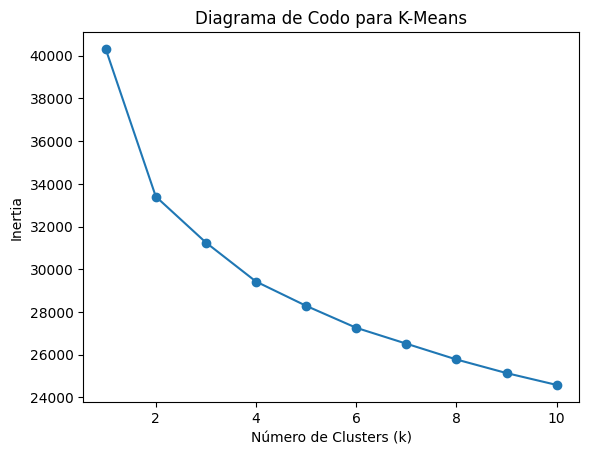

In [181]:
#Diagrama de codo
k_values = range(1, 11)
# Inercia / distancia promedio a los clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Diagrama de Codo para K-Means')
plt.show()

In [182]:
#Aplicamos Kmeans diviendolo en 2 clusters (grupos)
kmeans = KMeans(n_clusters=2, random_state=42)  #Ajustar el número de clusters
clusters = kmeans.fit_predict(X)

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [183]:
#Se a;ade la columna cluster con su valor respectivo (Adicto / No adicto)
df['cluster'] = clusters

In [184]:
df

,player_win,player_loss,push,total_hands,win_push,doubles_won,doubles_lost,player_bj,dealer_bj,dealer_bust,dealer_draw,dealer_stand,dealer_avg_hand,num_of_shuffles,cluster
0,20,23,3,46,23,1,1,1,2,12,16,18,17.852,1,1
1,14,31,1,46,15,2,7,2,1,7,21,18,18.258,2,1
2,23,22,3,48,26,4,2,2,2,14,18,16,18.267,3,0
3,21,23,4,48,25,3,1,2,3,13,14,21,18.168,4,0
4,18,28,3,49,21,3,1,0,4,9,19,21,18.199,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,20,24,3,47,23,2,1,2,0,15,13,19,18.096,92,0
2876,26,20,2,48,28,3,2,5,3,12,13,23,18.078,93,0
2877,21,22,3,46,24,3,4,3,1,14,18,14,18.076,94,0
2878,25,19,3,47,28,4,1,1,0,14,14,19,18.071,95,0


In [185]:
#Se crea y entrena el arbol de decision para analizar la importancia de las feature y su relacion al cluster
clf = DecisionTreeClassifier()
clf.fit(X, clusters)

DecisionTreeClassifier()

In [186]:
#Se extraen la importancia de estas
importances = clf.feature_importances_
feature_importances = pd.DataFrame(importances, index=numeric_features, columns=['importance']).sort_values('importance', ascending=False)

In [187]:
#Importancia de las feature en el problema
print(feature_importances)

                 importance
player_loss        0.630285
dealer_bust        0.173901
player_win         0.074222
dealer_avg_hand    0.021820
doubles_won        0.019980
dealer_draw        0.012996
dealer_stand       0.010867
num_of_shuffles    0.010685
push               0.010444
doubles_lost       0.010392
dealer_bj          0.009784
player_bj          0.006857
total_hands        0.005325
win_push           0.002442


In [188]:
# Analizar los clusters
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)

         player_win  player_loss      push  total_hands   win_push  \
cluster                                                              
0         22.836567    20.586567  3.223881    46.647015  26.060448   
1         18.025974    25.977273  3.398052    47.401299  21.424026   

         doubles_won  doubles_lost  player_bj  dealer_bj  dealer_bust  \
cluster                                                                 
0           3.614925      1.861194   2.284328   1.861194    14.378358   
1           2.561039      2.462987   2.032468   2.434416    10.503896   

         dealer_draw  dealer_stand  dealer_avg_hand  num_of_shuffles  
cluster                                                               
0          14.960448     17.308209        18.041646        49.076119  
1          17.192857     19.704545        18.058364        47.998701  


In [189]:
#Expoertacion del modelo
joblib.dump(clusters, 'modelo_clustering.pkl')

['modelo_clustering.pkl']

In [190]:
silhouette_avg = silhouette_score(df, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.0510252182192736
